In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

In [2]:
import yfinance as yf

df = yf.download('COST', start="2018-01-01")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,187.229996,190.679993,186.740005,188.320007,170.348923,2509300
2018-01-03,188.820007,192.100006,188.380005,190.580002,172.393280,3364400
2018-01-04,192.000000,192.300003,187.559998,189.100006,171.054474,3525800
2018-01-05,189.429993,189.679993,186.720001,187.750000,169.833328,2819000
2018-01-08,187.320007,188.979996,187.250000,188.479996,170.493668,1961800
...,...,...,...,...,...,...
2024-04-08,713.510010,716.140015,710.869995,711.809998,711.809998,1459000
2024-04-09,716.239990,719.049988,706.979980,718.590027,718.590027,1388300
2024-04-10,711.000000,723.979980,708.950012,722.580017,722.580017,1832000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1580 entries, 2018-01-02 to 2024-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1580 non-null   float64
 1   High       1580 non-null   float64
 2   Low        1580 non-null   float64
 3   Close      1580 non-null   float64
 4   Adj Close  1580 non-null   float64
 5   Volume     1580 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 86.4 KB


In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df['Close'], test_size=0.2, shuffle=False)


In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data, trend='mul').fit()

In [6]:
steps = 100
predictions = model.forecast(steps=steps)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

test_predictions = model.forecast(steps=len(test_data))

mse = np.sqrt(mean_squared_error(test_data, test_predictions))
print(f'Root Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(test_data, test_predictions)
print(f'Mean Absolute Percentage Error: {mape}')

Root Mean Squared Error: 46.948982284364824
Mean Absolute Percentage Error: 0.049341181169009346


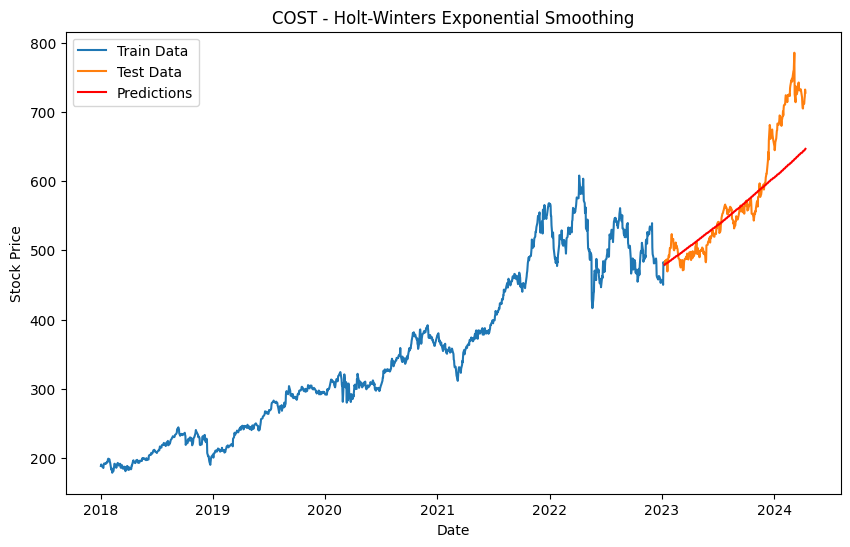

In [8]:
# Plot the predictions
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index[:len(test_predictions)], test_predictions, label='Predictions', color='red')
plt.title('COST - Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()